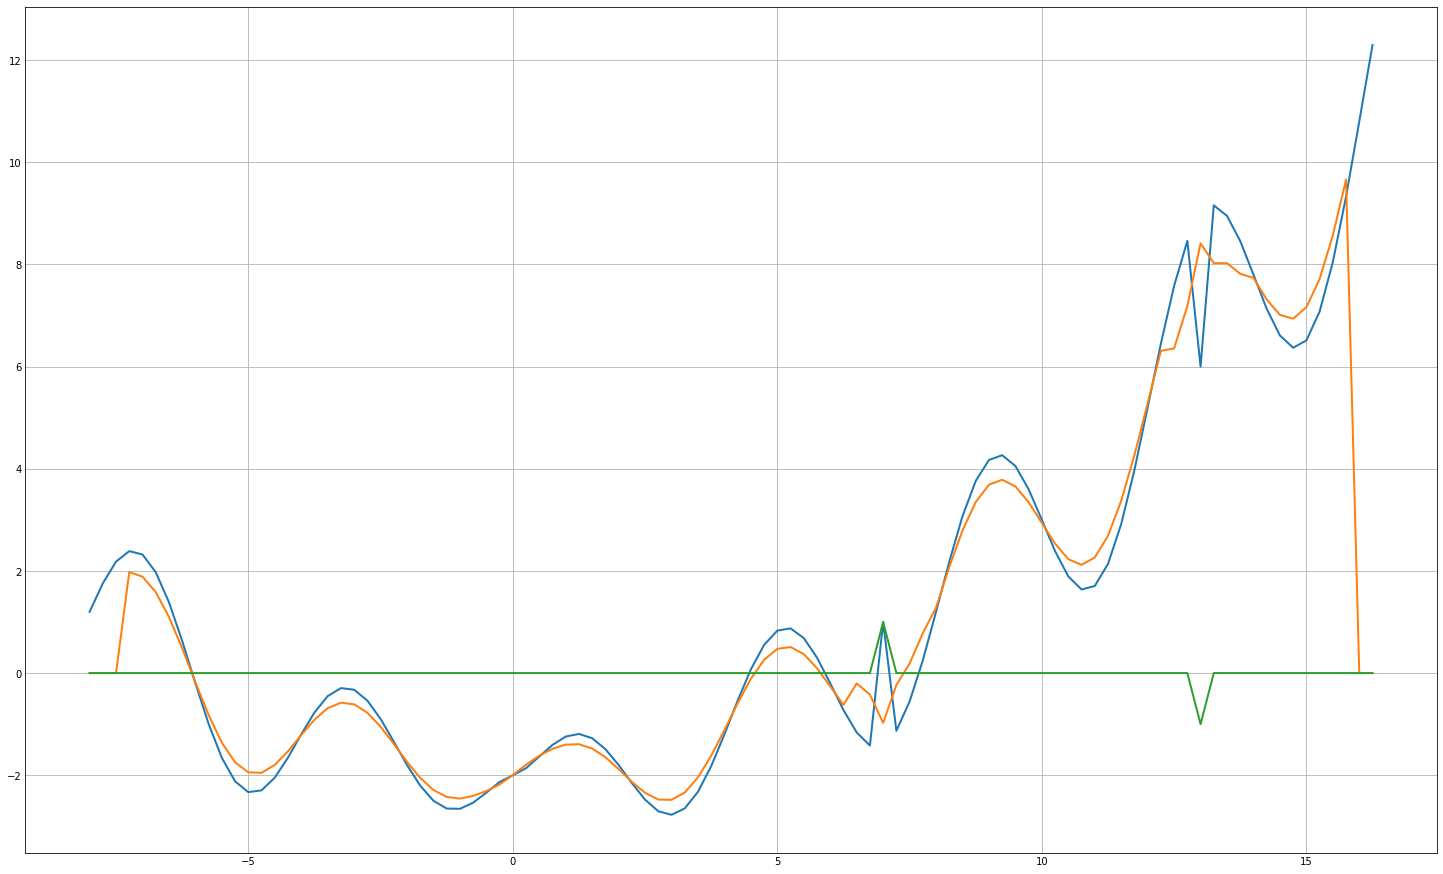

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 12 20:42:14 2022

@author: Fred Coerver
"""
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import sys
import os
import datetime
import time
import matplotlib as plt
from matplotlib import pyplot as plt
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
pd.options.display.float_format = '{:,.6f}'.format

#Userdefined module
from fad_v03 import Get_SandD

######################### READ DATA #################################################

td = pd.read_excel("./Testdata_inout2.xlsx",sheet_name="inputdata",usecols="B:C")


writer = pd.ExcelWriter("./Testdata.xlsx")
######################### INITIALIZE DATA   #########################################
kpi_input = td.columns.to_list()
t=1
P1inc= 15
accuracy = 5
window_sizeleft = 3
window_sizeright= 2
Time_scale=False
ignore_startsamples = 4
ignore_endsamples = 4
td_in = td[[kpi_input[0],kpi_input[t]]]
td_in = td

##########################  CALL MODULE   ###########################################
dfSin_gl, spikelist_gl = Get_SandD(td_in,
                                   acc=accuracy,
                                   windowsizeleft=window_sizeleft,
                                   windowsizeright=window_sizeright,
                                   sp_name=kpi_input[t],
                                   P1=P1inc,
                                   ignorestartsamples = ignore_startsamples,
                                   ignoreendsamples = ignore_endsamples,
                                   Timescale=Time_scale
                                   )

##########################    write data to excel   #################################
dfSin_gl.to_excel(writer,sheet_name="Sheet4")  
spikelist_gl.to_excel(writer,sheet_name="Sheet5") 
writer.save()
writer.close()

plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(td_in["x-value"],td_in["y-value"], linewidth=2.0)
ax.plot(td_in["x-value"],td_in["Regr_value"], linewidth=2.0)
ax.plot(td_in["x-value"],td_in["spike"], linewidth=2.0)

#ax.plot(td_in["x-value"],td_in["spikevalue"], linewidth=2.0)



In [22]:
spikelist_gl

,x-value,y-value,KPI_name,Regr_value,Value,Unixtime,Std,spike,spikevalue,Slope,Intercept,Diff,Regr_value_plus_std,Regr_value_min_std
